<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Binary_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with Keras
Classification with 2 classes (Yes, No)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(Booking_status)

In [6]:
X = df.drop(columns=['id', 'booking_status'])
Y = df[['booking_status']]

In [7]:
Y.value_counts()

booking_status
0                 25596
1                 16504
dtype: int64

<Axes: xlabel='booking_status'>

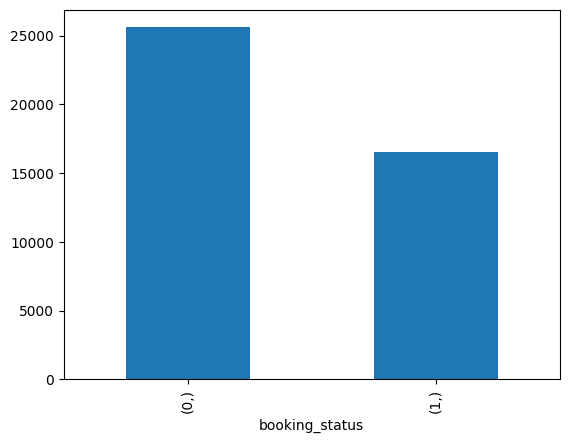

In [8]:
Y.value_counts().plot(kind='bar')

### Step 4: Preprocess the X data

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Step 5: Perform Train Test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [14]:
xtrain.shape

(33680, 17)

In [15]:
xtest.shape

(8420, 17)

In [16]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [17]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [18]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [19]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


### Step 6: Start Building the neural network

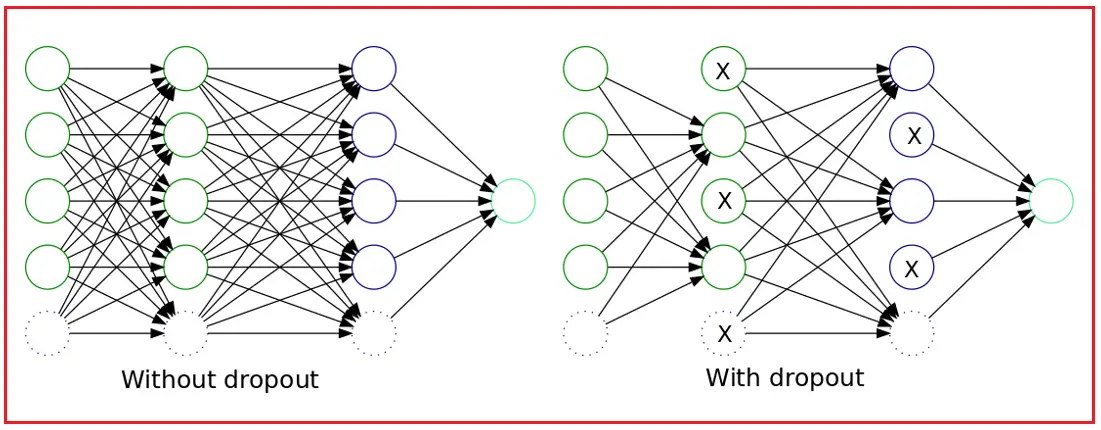

In [21]:
xtrain.shape[1]

17

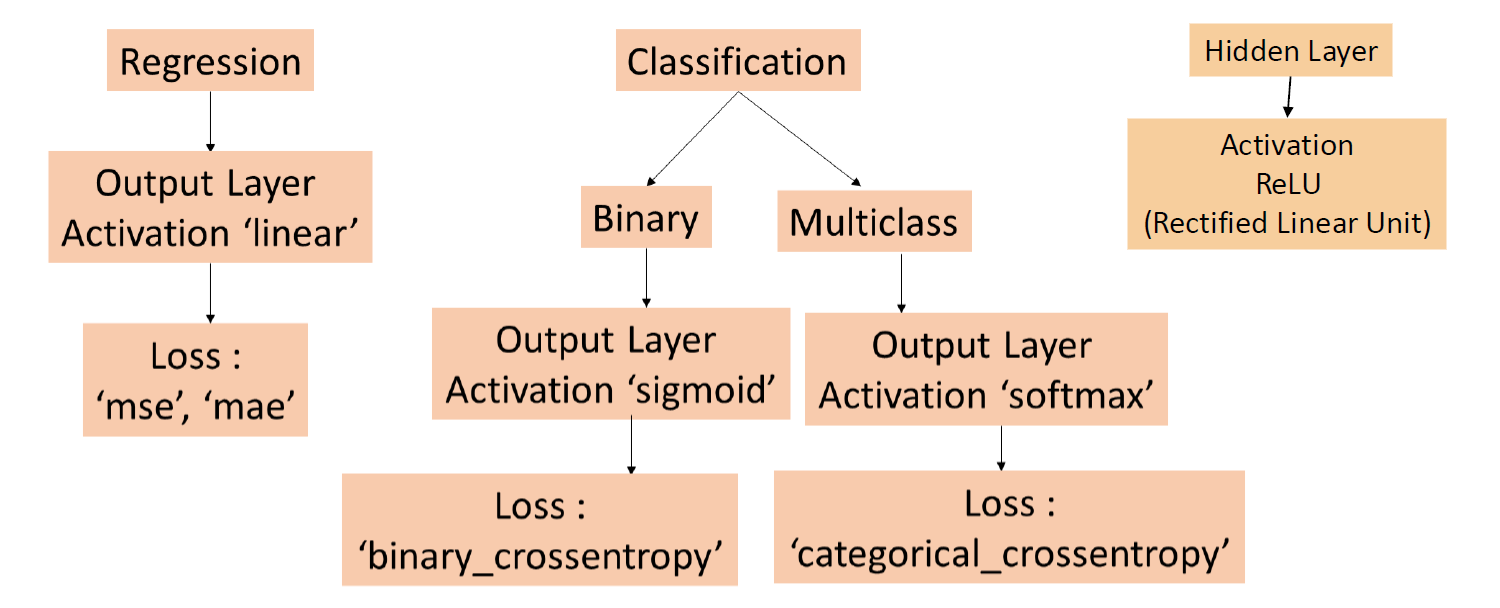

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [22]:
#Initalize the model
model = Sequential()

# Input Layer
model.add(Input(shape=(xtrain.shape[1],)))
# Create a Hidden layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer
model.add(Dropout(rate=0.5))
# Create a Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout layer
model.add(Dropout(rate=0.4))
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 [==============================] - 7s 5ms/step - loss: 0.5481 - accuracy: 0.7192 - val_loss: 0.4864 - val_accuracy: 0.7702
Epoch 2/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4962 - accuracy: 0.7651 - val_loss: 0.4797 - val_accuracy: 0.7732
Epoch 3/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4874 - accuracy: 0.7725 - val_loss: 0.4746 - val_accuracy: 0.7775
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4807 - accuracy: 0.7769 - val_loss: 0.4740 - val_accuracy: 0.7773
Epoch 5/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4774 - accuracy: 0.7765 - val_loss: 0.4699 - val_accuracy: 0.7781
Epoch 6/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4747 - accuracy: 0.7810 - val_loss: 0.4685 - val_accuracy: 0.7853
Epoch 7/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4697 - accuracy: 0.7830 - val_loss: 0.4671 - val_accuracy: 0.7824
Epoch 

### Plot the learning curve

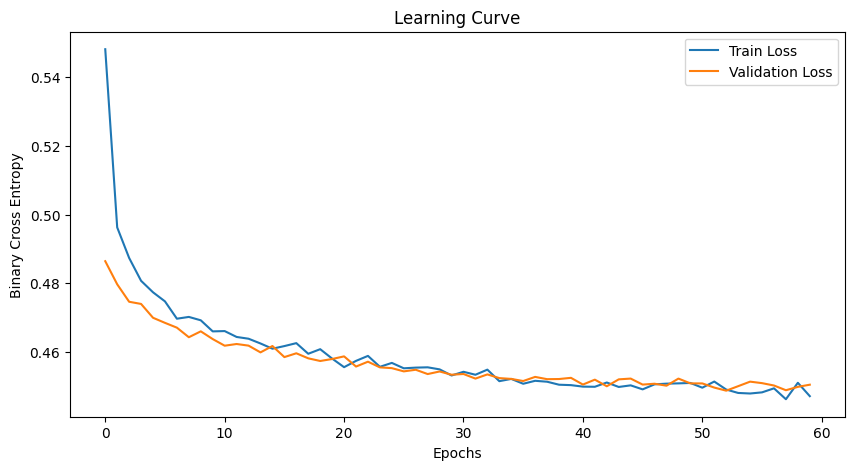

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model in train and test

In [28]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 5s 4ms/step - loss: 0.4308 - accuracy: 0.8054


[0.4308497905731201, 0.8053740859031677]

In [29]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 5ms/step - loss: 0.4359 - accuracy: 0.8012


[0.43587034940719604, 0.8011876344680786]

### Predict results for train and test

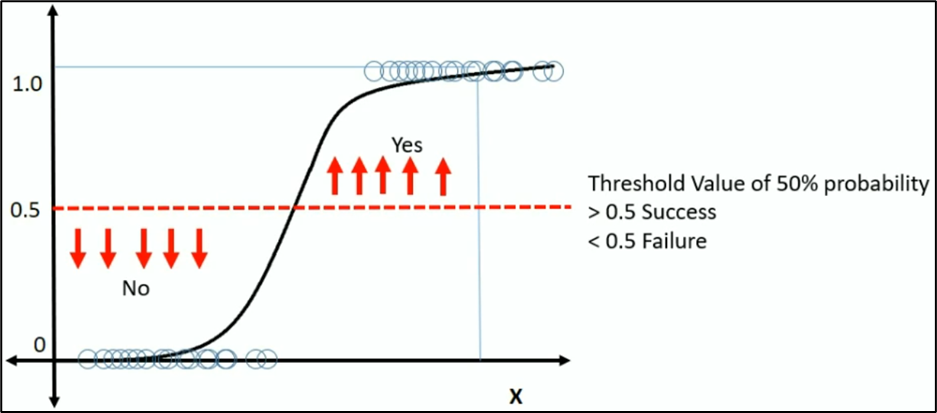

In [30]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 0s 2ms/step


In [31]:
yprob_train[0:5]

array([[0.00654798],
       [0.13975753],
       [0.7947423 ],
       [0.7530168 ],
       [0.79994905]], dtype=float32)

In [32]:
yprob_test[0:5]

array([[0.05014029],
       [0.91293776],
       [0.3650352 ],
       [0.01756083],
       [0.21204934]], dtype=float32)

In [33]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [34]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [35]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [36]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [37]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Create a confusion matrix for test

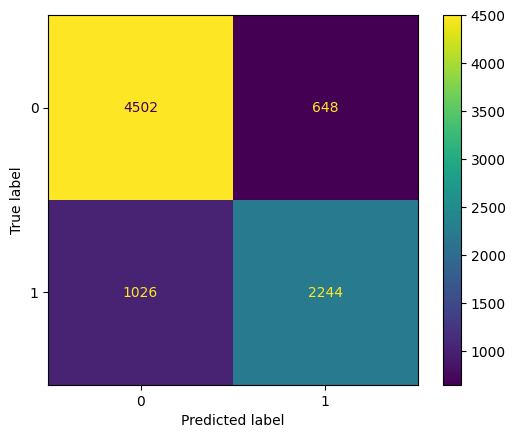

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5150
           1       0.78      0.69      0.73      3270

    accuracy                           0.80      8420
   macro avg       0.80      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



### Above model has good accuracy of 80% hence it is a good model

### Saving the model for future use

In [40]:
model.save('BookingModel.keras')

### Loading the model

In [41]:
from keras.models import load_model
m = load_model('/content/BookingModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform out of sample predictions

In [43]:
xnew = pd.read_csv('https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv')
xnew

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [44]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [46]:
xnew2 = xnew.drop(columns=['id'])

### pre2.transform

In [47]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [48]:
probs = model.predict(xnew_pre)
probs

878/878 [==============================] - 3s 3ms/step


array([[0.09275342],
       [0.04286697],
       [0.33046198],
       ...,
       [0.1685876 ],
       [0.4008568 ],
       [0.7493012 ]], dtype=float32)

In [49]:
preds = [1 if prob>=0.5 else 0 for prob in probs]

In [51]:
preds[0:5]

[0, 0, 0, 0, 1]

### Save above results to dataframe

In [52]:
df_results = xnew[['id']]
df_results

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [54]:
df_results['Booking_status'] = preds
df_results['Prob'] = probs

In [55]:
df_results

,id,Booking_status,Prob
0,42100,0,0.092753
1,42101,0,0.042867
2,42102,0,0.330462
3,42103,0,0.171166
4,42104,1,0.549049
...,...,...,...
28063,70163,1,0.975212
28064,70164,0,0.084190
28065,70165,0,0.168588
28066,70166,0,0.400857


In [56]:
df_results.to_csv('Results.csv', index=False)

In [57]:
df_results['Booking_status'].value_counts()

0    18556
1     9512
Name: Booking_status, dtype: int64

<Axes: >

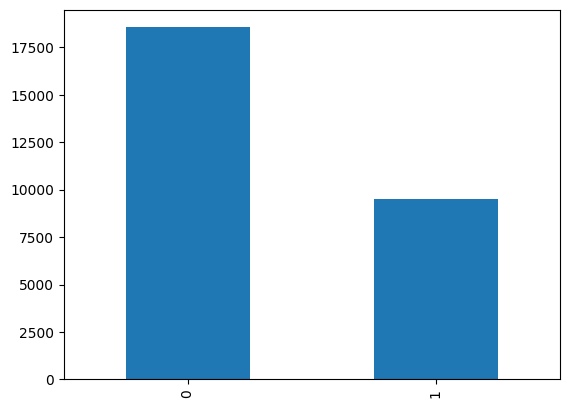

In [58]:
df_results['Booking_status'].value_counts().plot(kind='bar')